In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.layers import Dense, Activation, Input, Dropout
from keras import Sequential

from sklearn.model_selection import train_test_split as tts, StratifiedKFold as skf

from sklearn.impute import SimpleImputer

from utils import format_ppm_x

import statistics as stats

In [2]:
NUM_PREV_VALS = 3

In [3]:
data = pd.read_csv('../data/decomp_14_data.csv')

In [38]:
Trend = format_ppm_x(data.Trend, NUM_PREV_VALS)
Ssnl12 = format_ppm_x(data.Ssnl12, NUM_PREV_VALS)
Ssnl14 = format_ppm_x(data.Ssnl14, NUM_PREV_VALS)

checkpoint 1
checkpoint 1
checkpoint 1


In [39]:
TrendY, TrendX = Trend[0], Trend.iloc[:, Trend.columns != 0]
Ssnl12Y, Ssnl12X = Ssnl12[0], Ssnl12.iloc[:, Ssnl12.columns != 0]
Ssnl14Y, Ssnl14X = Ssnl14[0], Ssnl14.iloc[:, Ssnl12.columns != 0]

In [40]:
TrendY

0      315.132386
1      315.199760
2      315.266844
3      315.333884
4      315.401103
          ...    
719    408.158815
720    408.315269
721    408.471669
722    408.628176
723    408.784889
Name: 0, Length: 724, dtype: float64

In [41]:
optimizer = tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.4
)

Epoch 1/150
6/6 [==============================] - 2s 160ms/step - loss: 322.7415 - mse: 106115.6406 - val_loss: 93.0246 - val_mse: 8712.1025
Epoch 2/150
6/6 [==============================] - 1s 104ms/step - loss: 125.5409 - mse: 21490.1211 - val_loss: 78.1128 - val_mse: 6141.1196
Epoch 3/150
6/6 [==============================] - 1s 109ms/step - loss: 62.3922 - mse: 5132.6909 - val_loss: 37.1345 - val_mse: 1388.5786
Epoch 4/150
6/6 [==============================] - 1s 97ms/step - loss: 46.7816 - mse: 2515.9697 - val_loss: 76.6858 - val_mse: 5920.6494
Epoch 5/150
6/6 [==============================] - 1s 96ms/step - loss: 48.7913 - mse: 3125.3477 - val_loss: 33.4371 - val_mse: 1125.0494
Epoch 6/150
6/6 [==============================] - 1s 101ms/step - loss: 34.5364 - mse: 1605.4535 - val_loss: 7.0921 - val_mse: 50.7296
Epoch 7/150
6/6 [==============================] - 1s 105ms/step - loss: 33.6479 - mse: 1581.1508 - val_loss: 34.1132 - val_mse: 1171.8583
Epoch 8/150
6/6 [==========

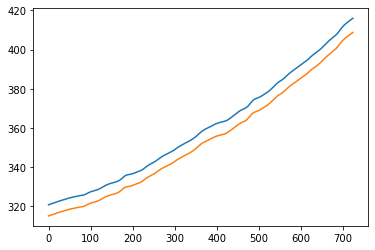

In [90]:
TrendModel = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='relu', input_shape=(NUM_PREV_VALS,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='relu'),
        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dense(units=256, activation='relu'),
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=32, activation='relu'),
        Dense(units=16, activation='relu'),
        Dense(units=8, activation='relu'),
        Dense(units=4, activation='relu'),
        Dense(units=1, activation='relu'),
    ]
)

TrendModel.compile(optimizer='Adagrad', loss='mae', metrics=['mse'])
X_train, X_test, Y_train, Y_test = tts(TrendX, TrendY)

TrendHistory = TrendModel.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=100,
    epochs=150
)

predictions_trend = []
for i, val in TrendX.iterrows():
    predictions_trend.append(TrendModel.predict(np.array(val).reshape(1,3)))

predictions_trend = np.array(predictions_trend).reshape(724,)

plt.plot(predictions_trend)
plt.plot(TrendY)

6.281772572808899

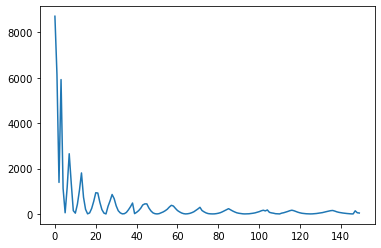

In [115]:
plt.plot(TrendHistory.history['val_mse'])
min(TrendHistory.history['val_mse'])
stats.sqrt(TrendHistory.history['val_mse'][-1])

Epoch 1/150
6/6 [==============================] - 1s 124ms/step - loss: 1.1802 - mse: 2.1603 - val_loss: 0.8526 - val_mse: 0.9052
Epoch 2/150
6/6 [==============================] - 1s 90ms/step - loss: 0.6240 - mse: 0.5394 - val_loss: 0.5523 - val_mse: 0.4697
Epoch 3/150
6/6 [==============================] - 1s 88ms/step - loss: 0.5241 - mse: 0.3896 - val_loss: 0.5462 - val_mse: 0.4141
Epoch 4/150
6/6 [==============================] - 1s 86ms/step - loss: 0.4970 - mse: 0.3520 - val_loss: 0.6461 - val_mse: 0.5567
Epoch 5/150
6/6 [==============================] - 1s 88ms/step - loss: 0.5092 - mse: 0.3706 - val_loss: 0.5067 - val_mse: 0.3621
Epoch 6/150
6/6 [==============================] - 1s 85ms/step - loss: 0.4873 - mse: 0.3416 - val_loss: 0.5002 - val_mse: 0.3718
Epoch 7/150
6/6 [==============================] - 1s 89ms/step - loss: 0.4847 - mse: 0.3380 - val_loss: 0.4750 - val_mse: 0.3133
Epoch 8/150
6/6 [==============================] - 1s 89ms/step - loss: 0.4670 - mse: 0.3

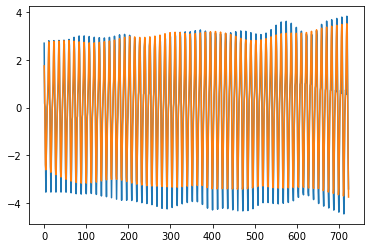

In [86]:
Ssnl12Model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='linear', input_shape=(NUM_PREV_VALS,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='linear'),
        Dense(units=1024, activation='linear'),
        Dense(units=512, activation='linear'),
        Dense(units=256, activation='linear'),
        Dense(units=128, activation='linear'),
        Dense(units=64, activation='linear'),
        Dense(units=32, activation='linear'),
        Dense(units=16, activation='linear'),
        Dense(units=8, activation='linear'),
        Dense(units=4, activation='linear'),
        Dense(units=1, activation='linear'),
    ]
)

Ssnl12Model.compile(optimizer='Adagrad', loss='mae', metrics=['mse'])
X_train, X_test, Y_train, Y_test = tts(Ssnl12X, Ssnl12Y)

Ssnl12History = Ssnl12Model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=100,
    epochs=150
)

predictions12 = []
for i, val in Ssnl12X.iterrows():
    predictions12.append(Ssnl12Model.predict(np.array(val).reshape(1,3)))

predictions12 = np.array(predictions12).reshape(724,)

plt.plot(predictions12)
plt.plot(Ssnl12Y)

Epoch 1/150
6/6 [==============================] - 1s 119ms/step - loss: 0.0698 - mse: 0.0094 - val_loss: 0.0777 - val_mse: 0.0106
Epoch 2/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0695 - mse: 0.0092 - val_loss: 0.0726 - val_mse: 0.0095
Epoch 3/150
6/6 [==============================] - 1s 89ms/step - loss: 0.0684 - mse: 0.0091 - val_loss: 0.0687 - val_mse: 0.0088
Epoch 4/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0686 - mse: 0.0091 - val_loss: 0.0685 - val_mse: 0.0087
Epoch 5/150
6/6 [==============================] - 1s 88ms/step - loss: 0.0685 - mse: 0.0091 - val_loss: 0.0671 - val_mse: 0.0085
Epoch 6/150
6/6 [==============================] - 1s 89ms/step - loss: 0.0676 - mse: 0.0089 - val_loss: 0.0666 - val_mse: 0.0084
Epoch 7/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0673 - mse: 0.0088 - val_loss: 0.0663 - val_mse: 0.0083
Epoch 8/150
6/6 [==============================] - 1s 88ms/step - loss: 0.0669 - mse: 0.0

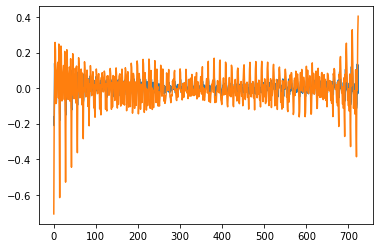

In [87]:
Ssnl14Model = Sequential(
    [
        # Input(shape=(47,)),
        Dense(units=4096, activation='linear', input_shape=(NUM_PREV_VALS,)),
        # Dense(units=4096, activation='relu'),
        Dense(units=2048, activation='linear'),
        Dense(units=1024, activation='linear'),
        Dense(units=512, activation='linear'),
        Dense(units=256, activation='linear'),
        Dense(units=128, activation='linear'),
        Dense(units=64, activation='linear'),
        Dense(units=32, activation='linear'),
        Dense(units=16, activation='linear'),
        Dense(units=8, activation='linear'),
        Dense(units=4, activation='linear'),
        Dense(units=1, activation='linear'),
    ]
)

Ssnl14Model.compile(optimizer='Adagrad', loss='mae', metrics=['mse'])
X_train, X_test, Y_train, Y_test = tts(Ssnl14X, Ssnl14Y)

Ssnl14History = Ssnl14Model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_test, Y_test),
    batch_size=100,
    epochs=150
)

# plt.plot(Ssnl14History.history['val_mse'])
# plt.plot(Ssnl14History.history['mse'])

predictions14 = []
for i, val in Ssnl14X.iterrows():
    predictions14.append(Ssnl14Model.predict(np.array(val).reshape(1,3)))

predictions14 = np.array(predictions14).reshape(724,)

plt.plot(predictions14)
plt.plot(Ssnl14Y)

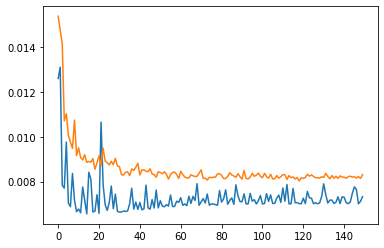

In [71]:
plt.plot(Ssnl14History.history['val_mse'])
plt.plot(Ssnl14History.history['mse'])

In [110]:
predictions_obs = [sum(i)-6.206 for i in zip(predictions_trend, predictions12, predictions14)]

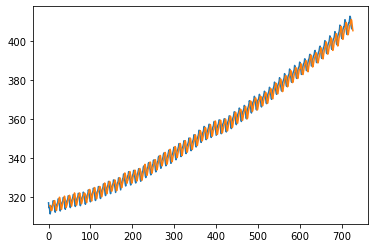

In [111]:
plt.plot(predictions_obs)
plt.plot(data.Observed[NUM_PREV_VALS:])

In [112]:
differences = []
for a, b in zip(predictions_obs, data.Observed[NUM_PREV_VALS:]):
    differences.append(abs(a-b))

In [113]:
stats.mean(differences)

0.5477729925532625